In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import SGD
import PIL

### Building The Model

In [2]:
# Download the architecture of ResNet50 with ImageNet weights
base_model = ResNet50(include_top=False, weights='imagenet')
 
# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(2, activation='softmax')(x)
 
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Compiling the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])

### Dataset 1

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/val/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 425 files belonging to 2 classes.
Found 118 files belonging to 2 classes.
Found 203 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_50_dataset_1")

Epoch 1/80
14/14 [==============================] - 6s 406ms/step - loss: 0.7136 - accuracy: 0.5435 - val_loss: 0.6384 - val_accuracy: 0.6186
Epoch 2/80
14/14 [==============================] - 4s 266ms/step - loss: 0.6388 - accuracy: 0.6565 - val_loss: 0.6417 - val_accuracy: 0.6356
Epoch 3/80
14/14 [==============================] - 4s 265ms/step - loss: 0.5903 - accuracy: 0.6800 - val_loss: 0.6517 - val_accuracy: 0.6356
Epoch 4/80
14/14 [==============================] - 4s 265ms/step - loss: 0.5585 - accuracy: 0.7318 - val_loss: 0.6525 - val_accuracy: 0.5763
Epoch 5/80
14/14 [==============================] - 4s 265ms/step - loss: 0.5243 - accuracy: 0.7694 - val_loss: 0.6549 - val_accuracy: 0.5678
Epoch 6/80
14/14 [==============================] - 4s 265ms/step - loss: 0.5094 - accuracy: 0.7600 - val_loss: 0.6529 - val_accuracy: 0.5932
Epoch 7/80
14/14 [==============================] - 4s 265ms/step - loss: 0.4885 - accuracy: 0.7835 - val_loss: 0.6532 - val_accuracy: 0.5763
Epoch 

14/14 [==============================] - 4s 265ms/step - loss: 0.2445 - accuracy: 0.9318 - val_loss: 0.5769 - val_accuracy: 0.7034
Epoch 59/80
14/14 [==============================] - 4s 266ms/step - loss: 0.2419 - accuracy: 0.9412 - val_loss: 0.5769 - val_accuracy: 0.7034
Epoch 60/80
14/14 [==============================] - 4s 267ms/step - loss: 0.2396 - accuracy: 0.9388 - val_loss: 0.5714 - val_accuracy: 0.7034
Epoch 61/80
14/14 [==============================] - 4s 266ms/step - loss: 0.2395 - accuracy: 0.9365 - val_loss: 0.5715 - val_accuracy: 0.6949
Epoch 62/80
14/14 [==============================] - 4s 267ms/step - loss: 0.2376 - accuracy: 0.9341 - val_loss: 0.5753 - val_accuracy: 0.7034
Epoch 63/80
14/14 [==============================] - 4s 266ms/step - loss: 0.2341 - accuracy: 0.9412 - val_loss: 0.5794 - val_accuracy: 0.7034
Epoch 64/80
14/14 [==============================] - 4s 270ms/step - loss: 0.2329 - accuracy: 0.9412 - val_loss: 0.5748 - val_accuracy: 0.7034
Epoch 65/80

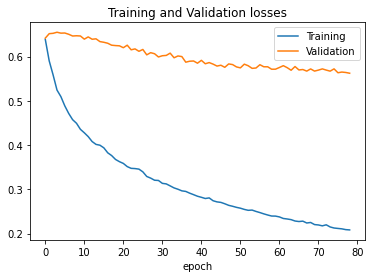

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/Resnet_50_ds_1.png")

In [7]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [8]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/20
14/14 [==============================] - 4s 274ms/step - loss: 0.2089 - accuracy: 0.9435 - val_loss: 0.5672 - val_accuracy: 0.7034
Epoch 2/20
14/14 [==============================] - 4s 268ms/step - loss: 0.2036 - accuracy: 0.9529 - val_loss: 0.5602 - val_accuracy: 0.7203
Epoch 3/20
14/14 [==============================] - 4s 268ms/step - loss: 0.2028 - accuracy: 0.9506 - val_loss: 0.5674 - val_accuracy: 0.7119
Epoch 4/20
14/14 [==============================] - 4s 267ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.5608 - val_accuracy: 0.7203
Epoch 5/20
14/14 [==============================] - 4s 268ms/step - loss: 0.2010 - accuracy: 0.9506 - val_loss: 0.5619 - val_accuracy: 0.7203
Epoch 6/20
14/14 [==============================] - 4s 268ms/step - loss: 0.1985 - accuracy: 0.9576 - val_loss: 0.5577 - val_accuracy: 0.7203
Epoch 7/20
14/14 [==============================] - 4s 268ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.5573 - val_accuracy: 0.7203
Epoch 

In [9]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 205ms/step - loss: 0.5562 - accuracy: 0.7635


[0.5562496781349182, 0.7635468244552612]

### Dataset 2

In [10]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/validation/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 612 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 91 files belonging to 2 classes.


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_50_dataset_2")

Epoch 1/80
20/20 [==============================] - 5s 266ms/step - loss: 0.3605 - accuracy: 0.8382 - val_loss: 0.3039 - val_accuracy: 0.8485
Epoch 2/80
20/20 [==============================] - 4s 182ms/step - loss: 0.3518 - accuracy: 0.8497 - val_loss: 0.2955 - val_accuracy: 0.8687
Epoch 3/80
20/20 [==============================] - 4s 182ms/step - loss: 0.3272 - accuracy: 0.8578 - val_loss: 0.2910 - val_accuracy: 0.8788
Epoch 4/80
20/20 [==============================] - 4s 182ms/step - loss: 0.3131 - accuracy: 0.8627 - val_loss: 0.2882 - val_accuracy: 0.8788
Epoch 5/80
20/20 [==============================] - 4s 182ms/step - loss: 0.3019 - accuracy: 0.8758 - val_loss: 0.2863 - val_accuracy: 0.8788
Epoch 6/80
20/20 [==============================] - 4s 182ms/step - loss: 0.2926 - accuracy: 0.8791 - val_loss: 0.2850 - val_accuracy: 0.8788
Epoch 7/80
20/20 [==============================] - 4s 182ms/step - loss: 0.2850 - accuracy: 0.8824 - val_loss: 0.2840 - val_accuracy: 0.8788
Epoch 

20/20 [==============================] - 4s 182ms/step - loss: 0.1727 - accuracy: 0.9477 - val_loss: 0.2651 - val_accuracy: 0.8788
Epoch 59/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1715 - accuracy: 0.9477 - val_loss: 0.2649 - val_accuracy: 0.8788
Epoch 60/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1704 - accuracy: 0.9477 - val_loss: 0.2648 - val_accuracy: 0.8788
Epoch 61/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1693 - accuracy: 0.9477 - val_loss: 0.2647 - val_accuracy: 0.8788
Epoch 62/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1682 - accuracy: 0.9477 - val_loss: 0.2646 - val_accuracy: 0.8788
Epoch 63/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1671 - accuracy: 0.9493 - val_loss: 0.2644 - val_accuracy: 0.8788
Epoch 64/80
20/20 [==============================] - 4s 182ms/step - loss: 0.1660 - accuracy: 0.9493 - val_loss: 0.2643 - val_accuracy: 0.8788
Epoch 65/80

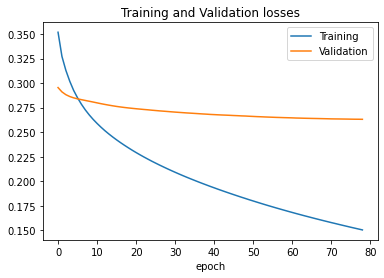

In [13]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/Resnet_50_ds_2.png")

In [14]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [15]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/20
20/20 [==============================] - 4s 183ms/step - loss: 0.1495 - accuracy: 0.9592 - val_loss: 0.2631 - val_accuracy: 0.8687
Epoch 2/20
20/20 [==============================] - 4s 183ms/step - loss: 0.1486 - accuracy: 0.9592 - val_loss: 0.2631 - val_accuracy: 0.8687
Epoch 3/20
20/20 [==============================] - 4s 182ms/step - loss: 0.1477 - accuracy: 0.9608 - val_loss: 0.2630 - val_accuracy: 0.8687
Epoch 4/20
20/20 [==============================] - 4s 182ms/step - loss: 0.1468 - accuracy: 0.9608 - val_loss: 0.2630 - val_accuracy: 0.8687
Epoch 5/20
20/20 [==============================] - 4s 183ms/step - loss: 0.1460 - accuracy: 0.9608 - val_loss: 0.2630 - val_accuracy: 0.8687
Epoch 6/20
20/20 [==============================] - 4s 182ms/step - loss: 0.1451 - accuracy: 0.9608 - val_loss: 0.2629 - val_accuracy: 0.8687
Epoch 7/20
20/20 [==============================] - 4s 182ms/step - loss: 0.1442 - accuracy: 0.9608 - val_loss: 0.2629 - val_accuracy: 0.8687
Epoch 

In [16]:
model.evaluate(test_ds)

3/3 [==============================] - 1s 317ms/step - loss: 0.2427 - accuracy: 0.9011


[0.24265599250793457, 0.901098906993866]

### Dataset 3

In [17]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.
Found 248 files belonging to 2 classes.


In [18]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_50_dataset_3")

Epoch 1/80
56/56 [==============================] - 18s 324ms/step - loss: 0.7842 - accuracy: 0.5848 - val_loss: 0.5567 - val_accuracy: 0.6996
Epoch 2/80
56/56 [==============================] - 17s 310ms/step - loss: 0.5355 - accuracy: 0.7303 - val_loss: 0.5155 - val_accuracy: 0.7220
Epoch 3/80
56/56 [==============================] - 17s 309ms/step - loss: 0.4614 - accuracy: 0.7706 - val_loss: 0.4217 - val_accuracy: 0.7892
Epoch 4/80
56/56 [==============================] - 17s 311ms/step - loss: 0.4226 - accuracy: 0.7969 - val_loss: 0.3799 - val_accuracy: 0.8139
Epoch 5/80
56/56 [==============================] - 17s 310ms/step - loss: 0.3920 - accuracy: 0.8209 - val_loss: 0.3633 - val_accuracy: 0.8139
Epoch 6/80
56/56 [==============================] - 17s 309ms/step - loss: 0.3703 - accuracy: 0.8344 - val_loss: 0.3440 - val_accuracy: 0.8251
Epoch 7/80
56/56 [==============================] - 17s 310ms/step - loss: 0.3553 - accuracy: 0.8416 - val_loss: 0.3343 - val_accuracy: 0.8251

Epoch 58/80
56/56 [==============================] - 17s 312ms/step - loss: 0.1654 - accuracy: 0.9452 - val_loss: 0.2053 - val_accuracy: 0.9170
Epoch 59/80
56/56 [==============================] - 17s 310ms/step - loss: 0.1634 - accuracy: 0.9457 - val_loss: 0.2035 - val_accuracy: 0.9170
Epoch 60/80
56/56 [==============================] - 17s 312ms/step - loss: 0.1620 - accuracy: 0.9502 - val_loss: 0.2002 - val_accuracy: 0.9215
Epoch 61/80
56/56 [==============================] - 17s 312ms/step - loss: 0.1618 - accuracy: 0.9491 - val_loss: 0.2078 - val_accuracy: 0.9148
Epoch 62/80
56/56 [==============================] - 17s 312ms/step - loss: 0.1587 - accuracy: 0.9502 - val_loss: 0.2018 - val_accuracy: 0.9215
Epoch 63/80
56/56 [==============================] - 17s 311ms/step - loss: 0.1588 - accuracy: 0.9474 - val_loss: 0.1976 - val_accuracy: 0.9238
Epoch 64/80
56/56 [==============================] - 17s 312ms/step - loss: 0.1582 - accuracy: 0.9502 - val_loss: 0.1954 - val_accuracy:

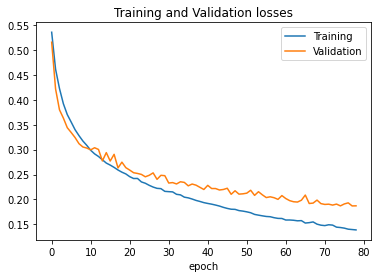

In [19]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/Resnet_50_ds_3.png")

In [20]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [21]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/20
56/56 [==============================] - 18s 319ms/step - loss: 0.1374 - accuracy: 0.9608 - val_loss: 0.1847 - val_accuracy: 0.9305
Epoch 2/20
56/56 [==============================] - 18s 316ms/step - loss: 0.1375 - accuracy: 0.9619 - val_loss: 0.1848 - val_accuracy: 0.9283
Epoch 3/20
56/56 [==============================] - 17s 310ms/step - loss: 0.1370 - accuracy: 0.9608 - val_loss: 0.1870 - val_accuracy: 0.9260
Epoch 4/20
56/56 [==============================] - 17s 310ms/step - loss: 0.1354 - accuracy: 0.9603 - val_loss: 0.1828 - val_accuracy: 0.9305
Epoch 5/20
56/56 [==============================] - 18s 329ms/step - loss: 0.1338 - accuracy: 0.9608 - val_loss: 0.1886 - val_accuracy: 0.9238
Epoch 6/20
56/56 [==============================] - 18s 326ms/step - loss: 0.1330 - accuracy: 0.9619 - val_loss: 0.1900 - val_accuracy: 0.9238
Epoch 7/20
56/56 [==============================] - 18s 316ms/step - loss: 0.1313 - accuracy: 0.9591 - val_loss: 0.1913 - val_accuracy: 0.9238

In [22]:
model.evaluate(test_ds)

8/8 [==============================] - 2s 225ms/step - loss: 0.1727 - accuracy: 0.9395


[0.1726762056350708, 0.9395161271095276]